In [20]:
import library as l

import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import datetime
import os

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

from scipy.stats import linregress

In [2]:
#loadstring = 'seed_1519_size_20000_topsize_300_date_2018-04-12'
loadstring = 'seed_39169_size_40000_topsize_300_date_2018-04-12'
#loadstring = 'seed_1100_size_2000_topsize_300_date_2018-04-23'

start_year = 2001
end_year = 2014

models = {}
for i, model in enumerate(['/LR_' + str(start_year+x) + '.data' for x in range(end_year - start_year + 1)]):
    models[i+1] = l.load_file(loadstring + model)

'''test_idx = {}
for i, indx in enumerate(['/test_idx_' + str(start_year+x) + '.data' for x in range(end_year - start_year + 1)]):
    test_idx[i+1] = l.load_file(loadstring + indx)
    
train_idx = {}
for i, indx in enumerate(['/train_idx_' + str(start_year+x) + '.data' for x in range(end_year - start_year + 1)]):
    train_idx[i+1] = l.load_file(loadstring + indx)'''

top_f = l.load_file(loadstring + '/top_f.data')
bot_f = l.load_file(loadstring + '/top_f.data')
CV = l.load_file(loadstring + '/CV_2001.data')
indices = l.load_file(loadstring + '/indices.data')
ratings = l.load_file(loadstring + '/ratings.data')
seen = l.load_file(loadstring + '/seen.data')
features = list(CV.get_feature_names())

train_idx = l.load_file(loadstring + '/train_idx.data')
test_idx = l.load_file(loadstring + '/test_idx.data')

print(len(features))

135009


In [3]:
tops = {}
for j in range(1,15):
    for i, (_,x) in enumerate(sorted(zip(models[j].coef_[0],features), reverse=True)):
        tops[x] = []
        if i >= 300:
            break
for j in range(1,15):
    for i, (_,x) in enumerate(sorted(zip(models[j].coef_[0],features), reverse=True)):
        if not tops.get(x) is None:
            if i + 1 > 1500:
                k = 1500
            else:
                k = i + 1
            tops[x].append(k)

bots = {}
for j in range(1,15):
    for i, (_,x) in enumerate(sorted(zip(models[j].coef_[0],features))):
        bots[x] = []
        if i >= 300:
            break
for j in range(1,15):
    for i, (_,x) in enumerate(sorted(zip(models[j].coef_[0],features))):
        if not bots.get(x) is None:
            if i + 1 > 1500:
                k = 1500
            else:
                k = i + 1
            bots[x].append(k)

In [4]:
top_slopes = []
temp = []

for key, values in tops.items():
    top_slopes.append([key, values])
    temp.append(sum(values))
top_slopes = [y for (x,y) in sorted(zip(temp, top_slopes))]

In [5]:
top_slopes[:10]

[['excellent', [4, 1, 5, 5, 1, 2, 1, 1, 2, 2, 4, 4, 4, 4]],
 ['great', [7, 6, 24, 2, 4, 1, 2, 2, 1, 1, 1, 1, 1, 1]],
 ['perfect', [3, 13, 6, 9, 5, 5, 3, 4, 4, 3, 2, 2, 2, 3]],
 ['highly', [1, 2, 2, 1, 2, 3, 5, 3, 5, 4, 5, 8, 13, 14]],
 ['amazing', [5, 5, 1, 4, 3, 6, 10, 8, 11, 8, 12, 11, 9, 10]],
 ['wonderful', [6, 3, 3, 3, 7, 4, 6, 6, 9, 7, 8, 16, 12, 16]],
 ['easy', [15, 8, 49, 10, 9, 7, 7, 7, 6, 9, 6, 5, 6, 6]],
 ['loved', [13, 14, 12, 20, 17, 9, 8, 14, 12, 10, 10, 12, 5, 5]],
 ['awesome', [11, 4, 4, 6, 12, 19, 18, 11, 26, 15, 21, 7, 7, 12]],
 ['love', [25, 33, 72, 13, 28, 8, 4, 5, 3, 5, 3, 3, 3, 2]]]

D:\Programs\Anaconda\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


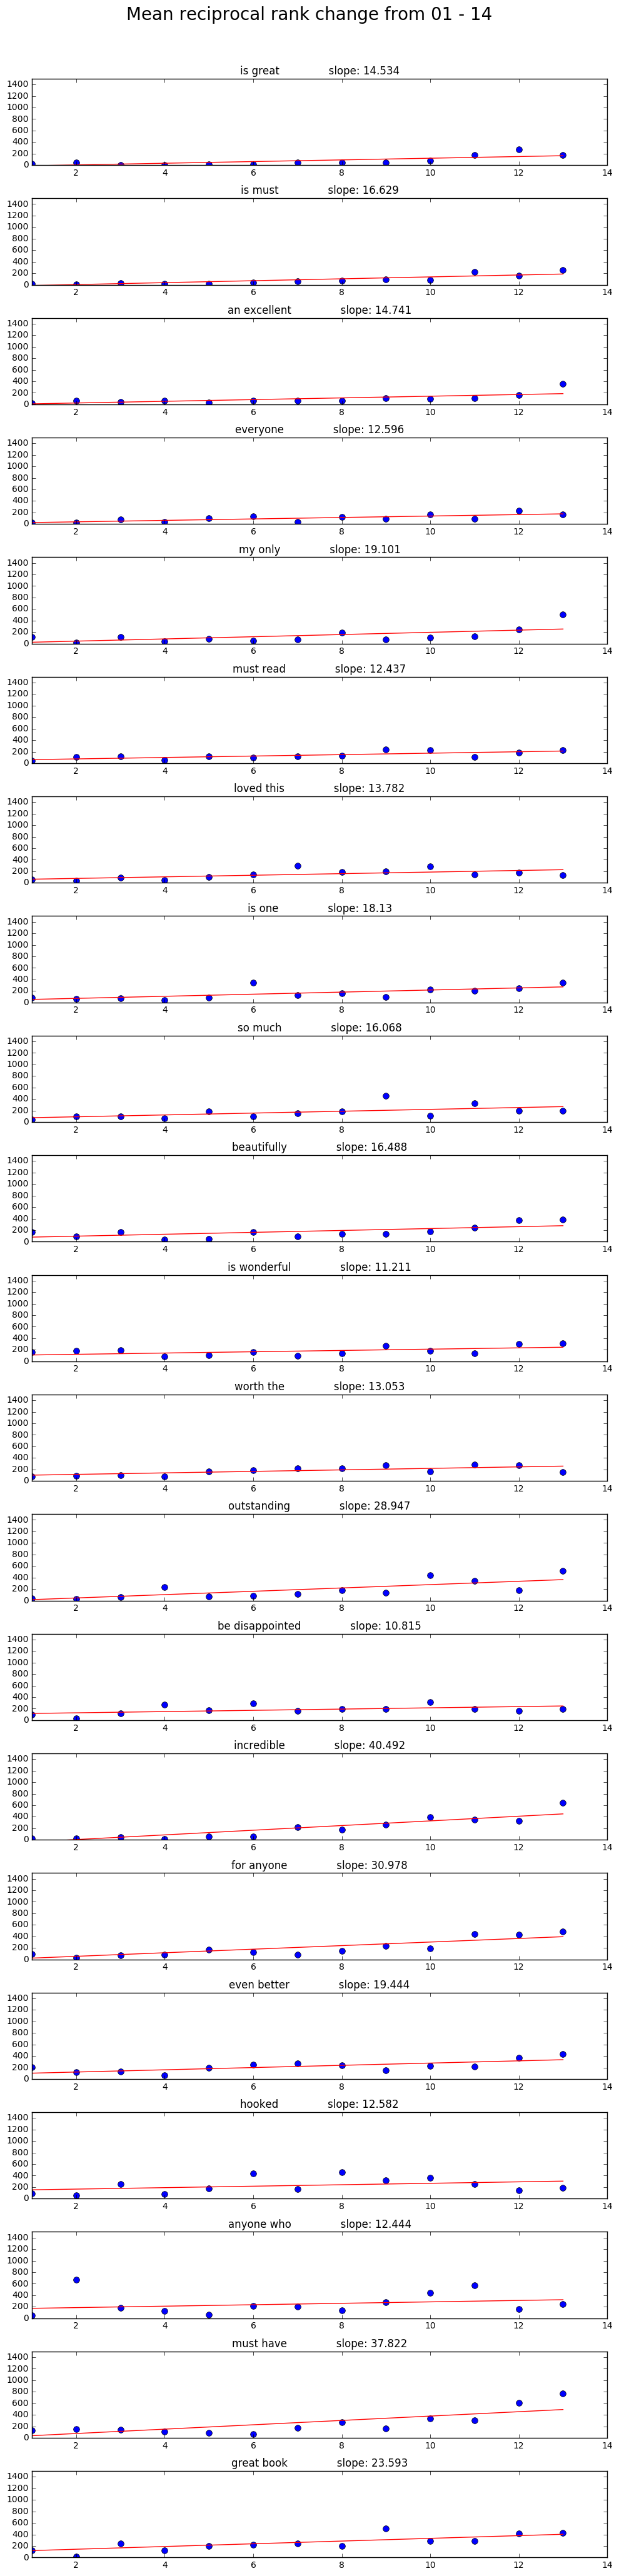

In [6]:
j = 0
for i in range(100):#len(top_slopes)):
    temp = top_slopes[i][1]
    x = range(len(temp))
    y = temp
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y)[0]
    if m > 10:
        if j == 0:
            fig = plt.figure() #figsize = (10,500)
            ax = fig.add_subplot(111)
            plt.plot(x, y, 'o', label='Original data', markersize=7)
            plt.plot(x, m*x + c, 'r', label='Fitted line')
            plt.axis([1, 14, 0, 1500])
            plt.title(top_slopes[i][0] + '               slope: ' + str(round(m, 3)))
        else:
            for k in range(j):
                fig.axes[k].change_geometry(j+1, 1, k+1)
            ax = fig.add_subplot(j+1, 1, j+1)
            plt.plot(x, y, 'o', label='Original data', markersize=7)
            plt.plot(x, m*x + c, 'r', label='Fitted line')
            plt.axis([1, 14, 0, 1500])
            plt.title(top_slopes[i][0] + '               slope: ' + str(round(m, 3)))
        j += 1
#plt.subplots_adjust(hspace=0.25)
fig.set_size_inches(10, 2*j, forward=True)
fig.tight_layout()
fig.suptitle('Mean reciprocal rank change from 01 - 14', fontsize=20)
plt.subplots_adjust(top=(j-1)/j)
plt.show()

In [7]:
bot_slopes = []
temp = []

for key, values in bots.items():
    bot_slopes.append([key, values])
    temp.append(sum(values))
bot_slopes = [y for (x,y) in sorted(zip(temp, bot_slopes))]

In [8]:
bot_slopes[:10]

[['disappointed', [5, 4, 5, 12, 5, 2, 2, 1, 2, 1, 1, 1, 1, 1]],
 ['waste', [4, 6, 4, 5, 2, 5, 8, 2, 6, 3, 4, 2, 3, 4]],
 ['unfortunately', [1, 1, 2, 2, 3, 1, 3, 3, 9, 2, 5, 4, 11, 32]],
 ['poor', [8, 5, 11, 14, 12, 11, 4, 8, 4, 4, 9, 15, 9, 12]],
 ['however', [20, 9, 62, 11, 15, 7, 5, 9, 3, 8, 6, 3, 5, 5]],
 ['nothing', [21, 16, 39, 6, 6, 3, 1, 13, 5, 6, 11, 12, 15, 23]],
 ['bad', [13, 8, 38, 1, 9, 6, 7, 7, 1, 9, 7, 8, 18, 47]],
 ['worst', [2, 2, 1, 3, 1, 8, 9, 5, 14, 7, 13, 13, 49, 77]],
 ['money', [37, 11, 97, 7, 7, 10, 6, 10, 8, 12, 3, 5, 6, 3]],
 ['boring', [3, 3, 3, 4, 4, 4, 14, 4, 15, 22, 49, 30, 28, 42]]]

D:\Programs\Anaconda\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


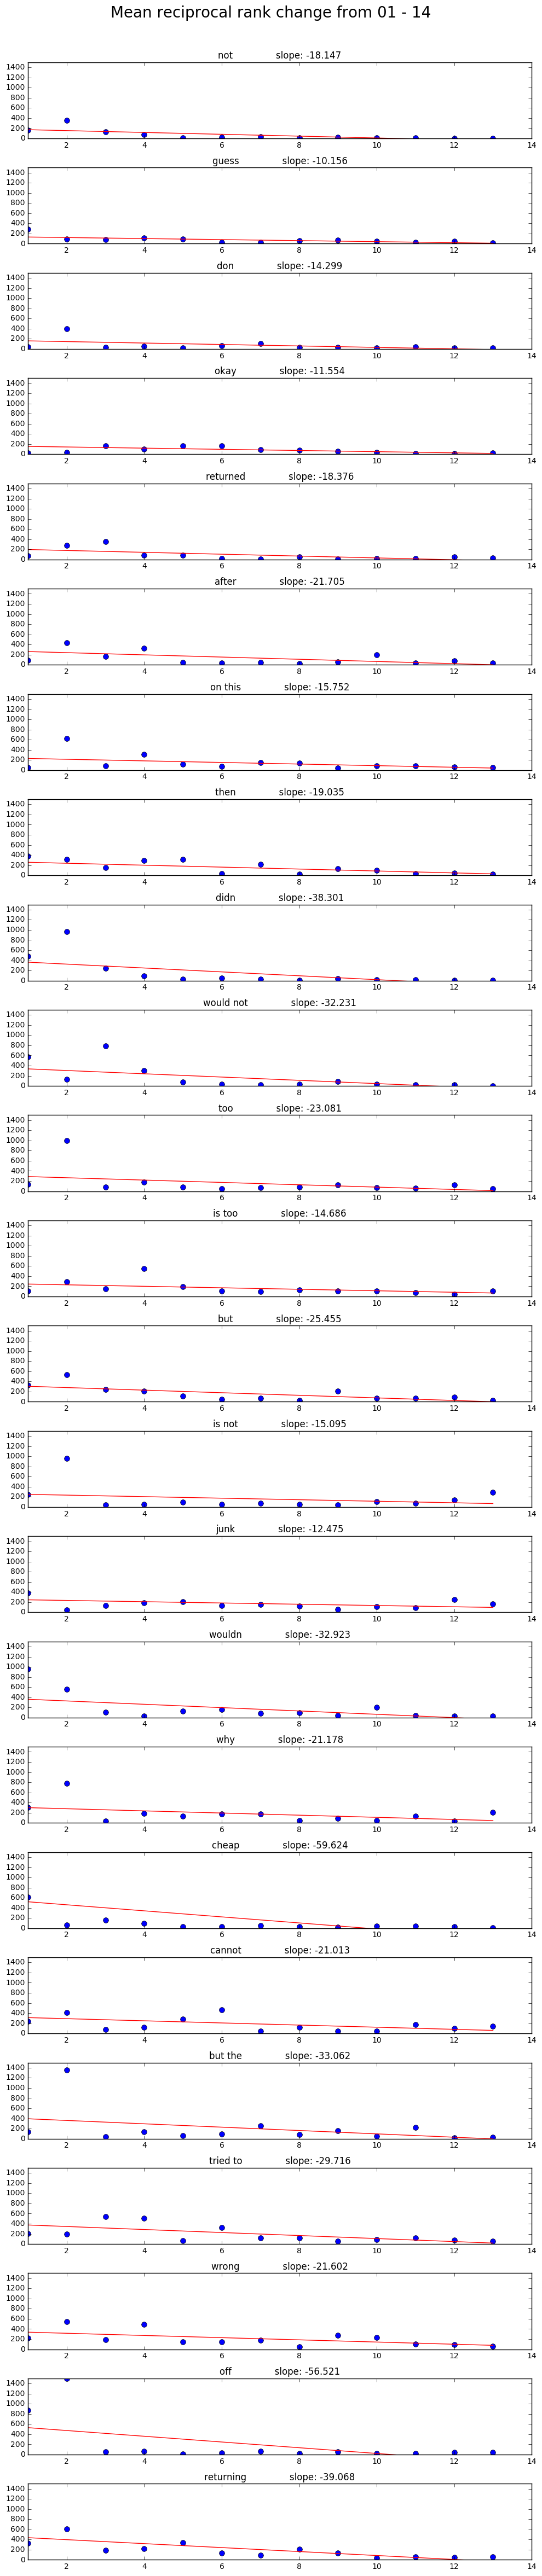

In [9]:
j = 0
for i in range(100):#len(top_slopes)):
    temp = bot_slopes[i][1]
    x = range(len(temp))
    y = temp
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y)[0]
    if m < -10:
        if j == 0:
            fig = plt.figure() #figsize = (10,500)
            ax = fig.add_subplot(111)
            plt.plot(x, y, 'o', label='Original data', markersize=7)
            plt.plot(x, m*x + c, 'r', label='Fitted line')
            plt.axis([1, 14, 0, 1500])
            plt.title(bot_slopes[i][0] + '               slope: ' + str(round(m, 3)))
        else:
            for k in range(j):
                fig.axes[k].change_geometry(j+1, 1, k+1)
            ax = fig.add_subplot(j+1, 1, j+1)
            plt.plot(x, y, 'o', label='Original data', markersize=7)
            plt.plot(x, m*x + c, 'r', label='Fitted line')
            plt.axis([1, 14, 0, 1500])
            plt.title(bot_slopes[i][0] + '               slope: ' + str(round(m, 3)))
        j += 1
#plt.subplots_adjust(hspace=0.25)
fig.set_size_inches(10, 2*j, forward=True)
fig.tight_layout()
fig.suptitle('Mean reciprocal rank change from 01 - 14', fontsize=20)
plt.subplots_adjust(top=(j-1)/j)
plt.show()

In [11]:
df = pd.DataFrame(data={k:v.coef_[0] for (k,v) in models.items()}, index=features)

In [12]:
df[df > 0.01].dropna().index

Index(['able', 'able to', 'addition to', 'adds', 'ago', 'album', 'all',
       'all time', 'allows', 'always',
       ...
       'worth the', 'wow', 'years', 'yet', 'yet but', 'you', 'you don',
       'you ll', 'you will', 'you won'],
      dtype='object', length=334)

In [13]:
df[df < -0.01].dropna().index

Index(['actual', 'actually', 'after', 'alright', 'an ok', 'and boring',
       'annoying', 'anything', 'apparently', 'are too',
       ...
       'worst', 'worthless', 'would', 'would not', 'wouldn', 'writing',
       'wrong', 'you want', 'your money', 'your time'],
      dtype='object', length=348)

In [43]:
pos = list(df[df > 0.001].dropna(thresh=7).index)
neg = list(df[df < -0.001].dropna(thresh=7).index)

LinregressResult(slope=0.0017550704550376801, intercept=-0.012924835486723707, rvalue=0.12967443763804143, pvalue=0.6586090599497867, stderr=0.0038740665737684666)
slope:  0.0017550704550376801


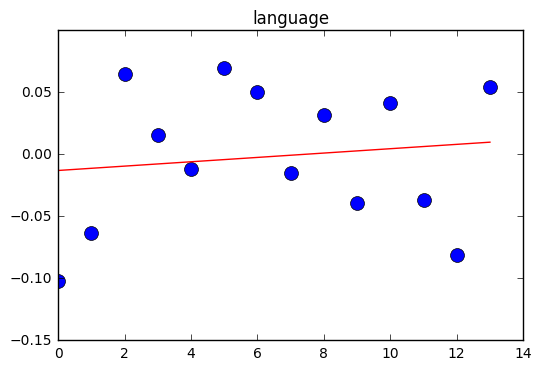

LinregressResult(slope=-0.0030912132592156114, intercept=0.021902589862125947, rvalue=-0.21983552036620346, pvalue=0.45014586218016217, stderr=0.003959899857604374)
slope:  -0.0030912132592156114


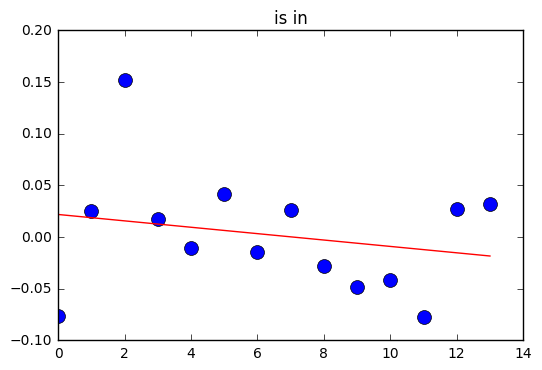

LinregressResult(slope=0.00026621921414038614, intercept=-0.009876215672455666, rvalue=0.02006188160281213, pvalue=0.9457282717963031, stderr=0.0038299199449344638)
slope:  0.00026621921414038614


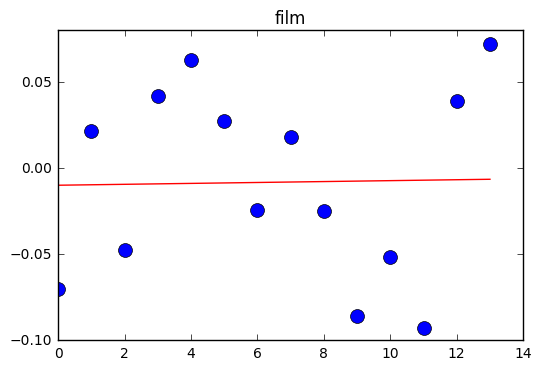

In [36]:
for k in list(set(pos + neg)):
    if k in pos and k in neg:
            temp = df.loc[k]
            x = range(len(temp))
            y = temp
            A = np.vstack([x, np.ones(len(x))]).T
            m, c, rval, pval, stderr = linregress(x, y)
            print(linregress(x, y))
            print('slope: ', m)
            plt.plot(x, y, 'o', label='Original data', markersize=10)
            plt.plot(x, m*x + c, 'r', label='Fitted line')
            plt.title(k)
            plt.show()

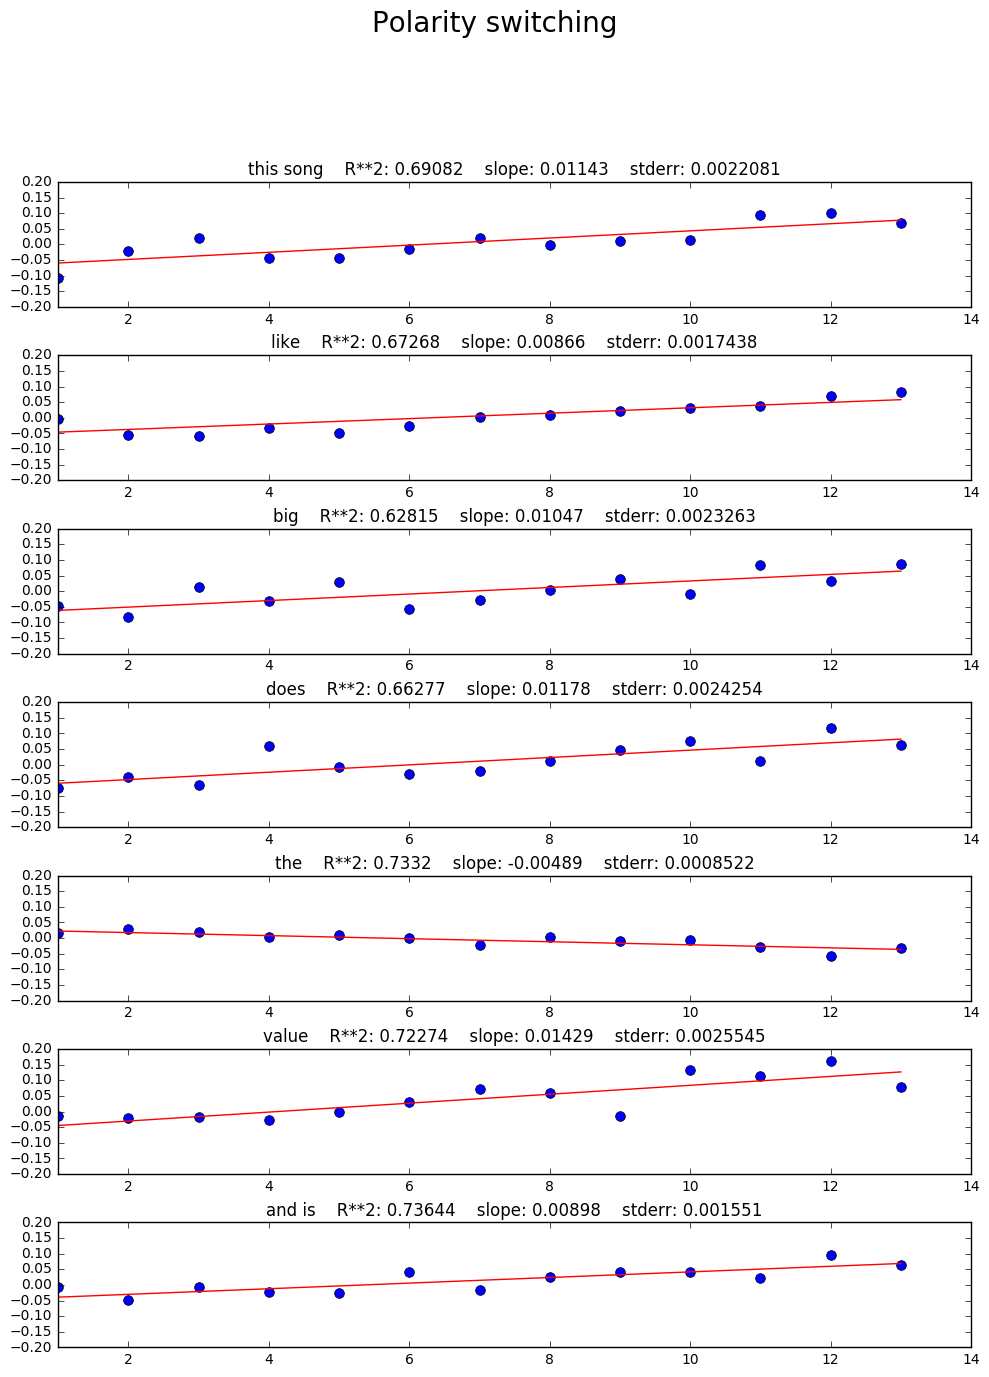

In [63]:
j = 0
for i in list(set(pos + neg)):
    if i in pos and i in neg:
        temp = df.loc[i]
        x = range(len(temp))
        y = temp
        A = np.vstack([x, np.ones(len(x))]).T
        m, c, rval, pval, stderr = linregress(x, y)
        #print(rval)
        if rval**2 > 0.6:
            #print(round(m, 5), round(stderr, 7))
            if j == 0:
                fig = plt.figure() #figsize = (10,500)
                ax = fig.add_subplot(111)
                plt.plot(x, y, 'o', label='Original data', markersize=7)
                plt.plot(x, m*x + c, 'r', label='Fitted line')
                plt.axis([1, 14, -0.2, 0.2])
                plt.title(i + '    R**2: ' + str(round(rval**2, 5)) + '    slope: ' + str(round(m, 5)) + '    stderr: ' + str(round(stderr, 7)))
            else:
                for k in range(j):
                    fig.axes[k].change_geometry(j+1, 1, k+1)
                ax = fig.add_subplot(j+1, 1, j+1)
                plt.plot(x, y, 'o', label='Original data', markersize=7)
                plt.plot(x, m*x + c, 'r', label='Fitted line')
                plt.axis([1, 14, -0.2, 0.2])
                plt.title(i + '    R**2: ' + str(round(rval**2, 5)) + '    slope: ' + str(round(m, 5)) + '    stderr: ' + str(round(stderr, 7)))
            j += 1
#plt.subplots_adjust(hspace=0.25)
fig.set_size_inches(10, 2*j, forward=True)
fig.tight_layout()
fig.suptitle('Polarity switching', fontsize=20)
plt.subplots_adjust(top=(j-1)/j)
plt.show()